In [1]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id="78f4f5a7-9c4c-42c2-961b-875b0266bee5",
    resource_group_name="momenifarahani.farhad-rg",
    workspace_name="farhad-2023",
)

### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Load the Dataframe and look into first few rows
apple = pd.read_csv('../data/apple_stock_raw.csv')
apple.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


In [5]:
# Get to know the basic information like data type and missing values
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10737 entries, 0 to 10736
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10737 non-null  object 
 1   Open          10737 non-null  float64
 2   High          10737 non-null  float64
 3   Low           10737 non-null  float64
 4   Close         10737 non-null  float64
 5   Volume        10737 non-null  int64  
 6   Dividends     10737 non-null  float64
 7   Stock Splits  10737 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 671.2+ KB


The DataFrame is free from any **missing values**, and the **'Date'** column is currently in **object** format. To facilitate further exploration, it would be beneficial to convert the 'Date' column to the **datetime** format. 

In [6]:
# Make statistical summary
apple.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10737.000000,10737.000000,10737.000000,10737.000000,1.073700e+04,10737.00000,10737.000000
mean,17.584003,17.782628,17.393884,17.596934,3.243470e+08,0.00068,0.001583
std,38.188817,38.637800,37.773479,38.228173,3.370383e+08,0.01094,0.084674
min,0.038535,0.038535,0.038102,0.038102,0.000000e+00,0.00000,0.000000
25%,0.239387,0.244619,0.233903,0.239677,1.186304e+08,0.00000,0.000000
50%,0.412073,0.419344,0.405089,0.411958,2.117584e+08,0.00000,0.000000
75%,15.610406,15.718784,15.458421,15.612144,4.042640e+08,0.00000,0.000000
max,193.779999,194.479996,191.809998,193.970001,7.421641e+09,0.24000,7.000000


### Pre-processing

- Change the 'Date' column type to datetime format
- Filter the table after 2015 year
- Set the 'Date' column as the index and remove the time component
- Make a Return column:
Creating a 'Return' column in stock price analysis allows us to evaluate the daily rate of change in stock prices more clearly. This column helps in understanding how the stock's value fluctuates over time, making it easier to compare its performance relative to its past values and assess factors like volatility, risk, and forecasting models more effectively.
- Drop Unuseful columns
  - Dividends
  - Stock Splits
- Drop missing values

In [7]:
# Extract the date part from the 'Date' column and convert it to datetime format
apple['Date'] = apple['Date'].str.split(' ').str[0]
apple['Date'] = pd.to_datetime(apple['Date'])

# Filter the table after 2015
apple = apple[apple['Date'] >= '2015-01-01']

# Set the 'Date' column as the index and remove the time component
apple.set_index('Date', inplace=True)
apple.index = apple.index.date

# Sort the DataFrame based on dates in ascending order
apple.sort_index(inplace=True)

# Make the Return column 
apple['Return'] = (apple['Close'] - apple['Open']) / apple['Open']

# Drop unuseful columns
apple = apple.drop(columns=['Dividends', 'Stock Splits'], axis=1)

# Display the first few rows of the DataFrame
apple.head()

,Open,High,Low,Close,Volume,Return
2015-01-02,24.993993,25.005213,24.087486,24.531765,212818400,-0.018494
2015-01-05,24.298413,24.379191,23.652191,23.840672,257142000,-0.018838
2015-01-06,23.905738,24.105438,23.477166,23.842911,263188400,-0.002628
2015-01-07,24.053829,24.278212,23.941638,24.177240,160423600,0.005131
2015-01-08,24.509327,25.164524,24.390403,25.106184,237458000,0.024352


### Explore the data

- Close: The price of AAPL when the stock market closes
- High: The highest price of AAPL during that trading day
- Low: The lowest price of AAPL during that trading day
- Open: The price of AAPL when the stock market opens
- Volume: How many shares of AAPL were traded that day

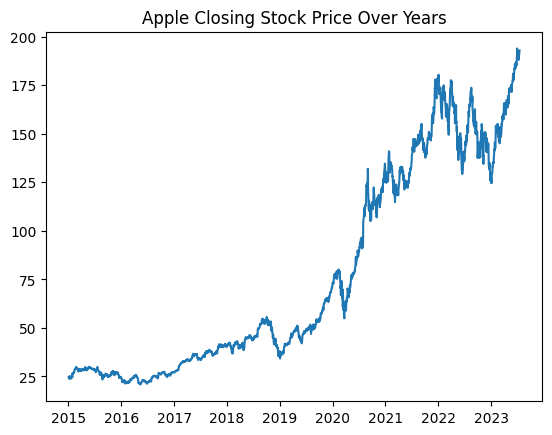

In [20]:
# Plot the closing stock price over years
apple['Close'].plot()
plt.title("Apple Closing Stock Price Over Years");

**Above Plot shows us that Apple stock price had a huge positive trend from 2020 to 2021 and negative trend from 2022 to 2023 but in overall, had a positive trend in recent 8 years.**

Text(0.5, 1.0, 'Apple Return Stock Rate Over Years')

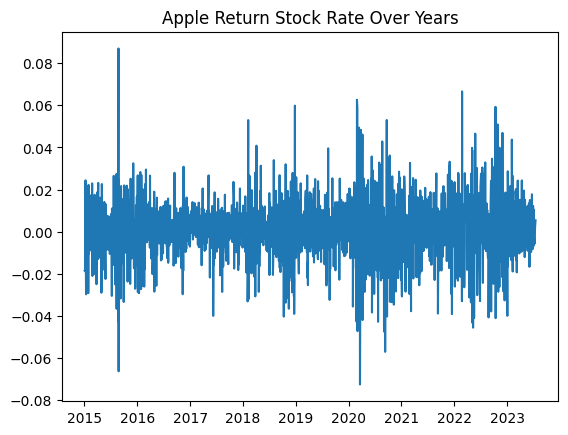

In [21]:
# Plot the daily Return rate over years
apple['Return'].plot()
plt.title("Apple Return Stock Rate Over Years")

**The Return plot is valuable when considering daily stock trading. The plot reveals that most positive and negative return rates hover around 2% and are generally less than 6%. This observation suggests potential opportunities for daily trades, as positive rates appear to outweigh negative ones.**

**Notably, from 2020 to 2021, negative rates surpass positive ones, exhibiting substantial fluctuations. This trend aligns with the impact of COVID-19 and market instability during those years, signifying heightened risks in the market during that period.**

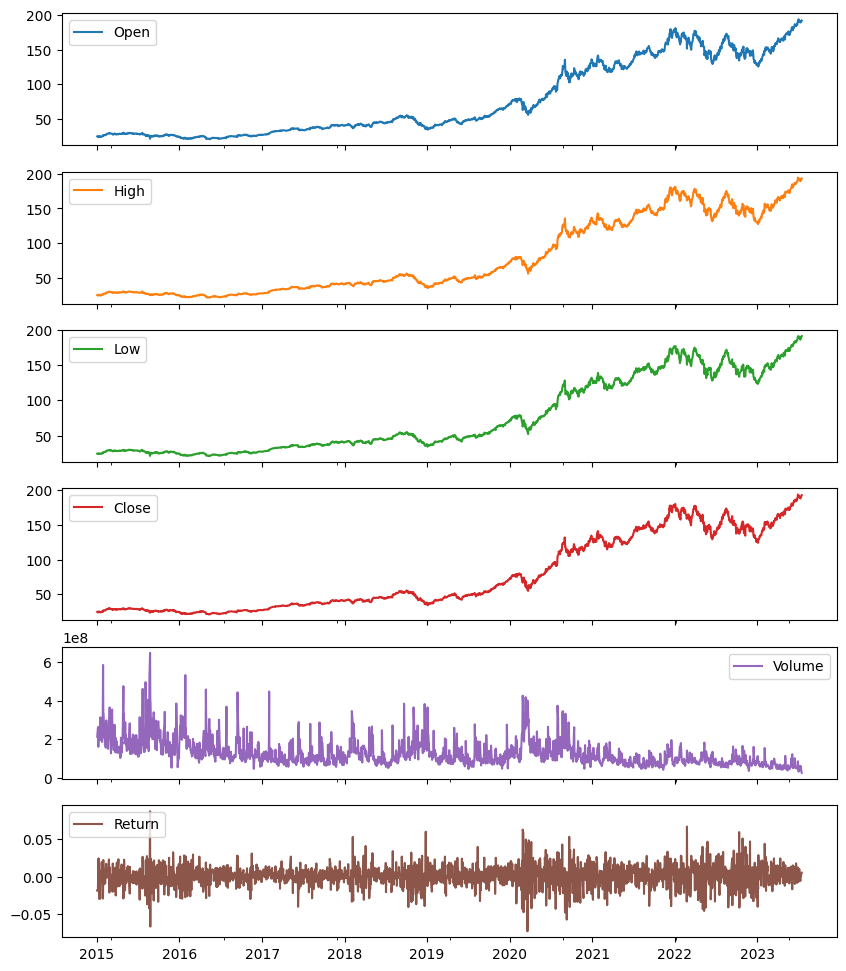

In [18]:
# Plot all contents in the Apple Dataframe
apple.plot(subplots=True, figsize=(10, 12));